In [ ]:
!pip install matplotlib

In [53]:
import pandas as pd
from clearml import Task
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def scale(df):
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

def get_dataframe(data):
    res = {k : pd.Series(data[k]['y']) for k in data.keys()}
    return pd.DataFrame(res)
    
# Fetch the task by ID
last_id = Task.get_all().response_data['tasks'][-1]['id']
task = Task.get_task(task_id=last_id)
#task = Task.current_task()

# Retrieve logged data
logged_data = task.get_all_reported_scalars()

In [54]:
train_log = get_dataframe(logged_data['train'])
train_log.iloc[::10, :]

,loss,grad_norm,learning_rate
0,1.8122,0.473018,0.000006
10,1.3482,0.998027,0.000019
20,1.2939,1.263596,0.000018
30,1.1387,1.679024,0.000017
40,1.2139,1.710629,0.000015
50,1.0953,2.082806,0.000014
60,1.0798,1.948631,0.000013


<Axes: >

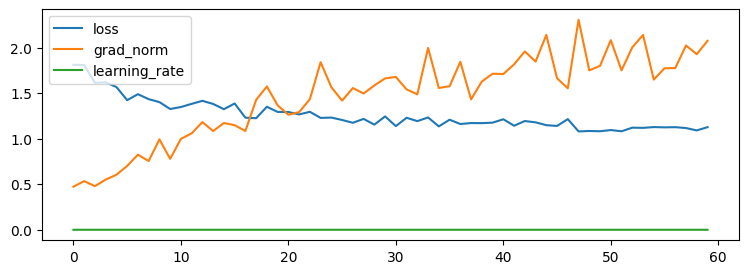

In [42]:
train_log.plot(figsize=(9,3))

In [55]:
eval_log = get_dataframe(logged_data['eval'])
eval_log

,loss,bleu,rouge1,rouge2,rougeL,f1,runtime,samples_per_second,steps_per_second
0,0.594393,0.860073,0.944676,0.873531,0.856740,0.858403,1816.4596,0.366,0.366
1,0.576954,0.860576,0.945251,0.873415,0.857215,0.858892,1798.4670,0.369,0.369


<Axes: >

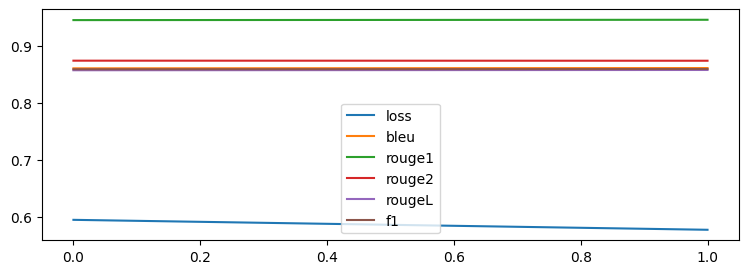

In [52]:
eval_log.drop(['runtime','samples_per_second','steps_per_second'], axis=1).plot(figsize=(9,3))

In [ ]:
# Export to CSV
eval_log.to_csv("eval_log.csv", index=False)
train_log.to_csv("train_log.csv", index=False)